In [ ]:
import os
import json

# Your Kaggle API token info
kaggle_token = {
    "username": "dhanajeyahemanthb",
    "key": "be2511a99e9c708dfb8512aace625179"
}

# Make the directory for kaggle.json
os.makedirs("/root/.kaggle", exist_ok=True)

# Save credentials securely
with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_token, file)  # <- this line was previously not indented correctly

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("✅ Kaggle authentication setup completed.")


✅ Kaggle authentication setup completed.


In [ ]:
!kaggle datasets download -d maitridsavla/alzimer-segmented

Dataset URL: https://www.kaggle.com/datasets/maitridsavla/alzimer-segmented
License(s): unknown
  0% 0.00/32.4M [00:00<?, ?B/s]
100% 32.4M/32.4M [00:00<00:00, 916MB/s]


In [ ]:
import zipfile


with zipfile.ZipFile("alzimer-segmented.zip", 'r') as zip_ref:
    zip_ref.extractall("cancer")

print('✅ Dataset Unzipped into "cancer/" folder')


✅ Dataset Unzipped into "cancer/" folder


In [ ]:
cancer_classes = os.listdir("/content/cancer/segmented_images/train")
print("Alzimer_Classes ",cancer_classes)

Alzimer_Classes  ['VeryMildDemented', 'MildDemented', 'NonDemented', 'ModerateDemented']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_generator=train_datagen.flow_from_directory('/content/cancer/segmented_images/train',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='training')

Found 4098 images belonging to 4 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory('/content/cancer/segmented_images/train',target_size=(IMG_SIZE,IMG_SIZE),batch_size=BATCH_SIZE,class_mode='categorical',subset='validation')

Found 1023 images belonging to 4 classes.


In [ ]:
model=keras.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
layers.MaxPooling2D((2,2)),layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPooling2D((2,2)),layers.Conv2D(128,(3,3),activation='relu'),layers.MaxPooling2D((2,2)),
layers.Flatten(),layers.Dense(128,activation='relu'),layers.Dense(4,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 19s 94ms/step - accuracy: 0.4903 - loss: 1.1086 - val_accuracy: 0.3568 - val_loss: 1.3148
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.6726 - loss: 0.7723 - val_accuracy: 0.3705 - val_loss: 1.7868
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.7904 - loss: 0.5287 - val_accuracy: 0.2991 - val_loss: 2.1474
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.8921 - loss: 0.2851 - val_accuracy: 0.4692 - val_loss: 2.2987
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.9495 - loss: 0.1401 - val_accuracy: 0.4819 - val_loss: 2.3322


In [ ]:
model.save('D:\alzimer_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model =load_model('D:\alzimer_model.h5')
print("Model Loaded")

Model Loaded


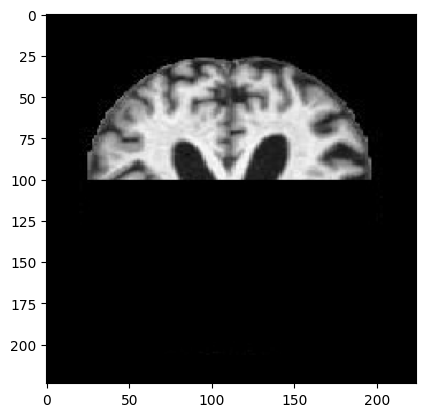

In [ ]:
test_image_path="/content/cancer/segmented_images/test/MildDemented/26 (19).jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.

In [ ]:
prediction=model.predict(img_array)
ind=np.argmax(prediction)
prediction=prediction[0][ind]
print(prediction)
predictited_class=cancer_classes[ind]
print(predictited_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0.6951916
ModerateDemented
